Generador de grafos conectados y ponderados, que admite como parametros el numero de vertices, el numero de aristas y el rango de pesos.

In [12]:
import random

def generate_graph(num_vertices, num_edges, weight_range=(1, 100)):
    """
    Generates a weighted, undirected, and connected graph.
    
    Parameters:
      - num_vertices: Number of vertices in the graph.
      - num_edges: Desired number of edges.
      - weight_range: Tuple (min, max) to assign random weights to the edges.
    
    Returns:
      - A dictionary representing the graph, where each key is a vertex and its value
        is a list of tuples (neighbor, weight).
    
    The generated graph is connected and is guaranteed to have exactly num_edges edges.
    """
    # Check that the number of edges is valid:
    # Minimum edges for connectivity: num_vertices - 1
    # Maximum edges for a simple graph: num_vertices * (num_vertices - 1) / 2
    if num_edges < num_vertices - 1 or num_edges > (num_vertices * (num_vertices - 1)) // 2:
        raise ValueError("Number of edges must be between {} and {} for a connected graph.".format(
            num_vertices - 1, (num_vertices * (num_vertices - 1)) // 2))
    
    # Initialize an empty graph represented as a dictionary
    graph = {i: [] for i in range(num_vertices)}
    # Set to store the edges that have been added (each edge is represented as a tuple (min(u, v), max(u, v)))
    edges = set()

    # Generate a spanning tree to ensure connectivity
    vertices = list(range(num_vertices))
    random.shuffle(vertices)
    for i in range(1, num_vertices):
        u = vertices[i]
        # Randomly choose a vertex that is already connected
        v = random.choice(vertices[:i])
        edge = (min(u, v), max(u, v))
        weight = random.randint(weight_range[0], weight_range[1])
        edges.add(edge)
        # Add the edge in both directions (undirected graph)
        graph[u].append((v, weight))
        graph[v].append((u, weight))

    # Add extra edges until the total number of edges reaches num_edges
    while len(edges) < num_edges:
        u = random.randint(0, num_vertices - 1)
        v = random.randint(0, num_vertices - 1)
        if u == v:
            continue  # Skip self-loops
        edge = (min(u, v), max(u, v))
        if edge in edges:
            continue  # Skip duplicate edges
        weight = random.randint(weight_range[0], weight_range[1])
        edges.add(edge)
        graph[u].append((v, weight))
        graph[v].append((u, weight))

    return graph

# Example usage:
n = 10   # Number of vertices
m = 15  # Number of edges
graph = generate_graph(n, m)
    
# Display the generated graph
for vertex, neighbors in graph.items():
    print(f"{vertex}: {neighbors}")


0: [(2, 47), (8, 65), (3, 97)]
1: [(2, 49), (9, 17), (7, 59), (4, 5), (5, 68), (8, 79)]
2: [(1, 49), (0, 47), (5, 3), (8, 95)]
3: [(0, 97), (7, 90)]
4: [(1, 5)]
5: [(2, 3), (1, 68), (6, 74)]
6: [(7, 46), (8, 75), (5, 74)]
7: [(1, 59), (6, 46), (3, 90)]
8: [(0, 65), (6, 75), (1, 79), (2, 95)]
9: [(1, 17)]


Se pueden visualizar los grafos generados con la siguiente función:

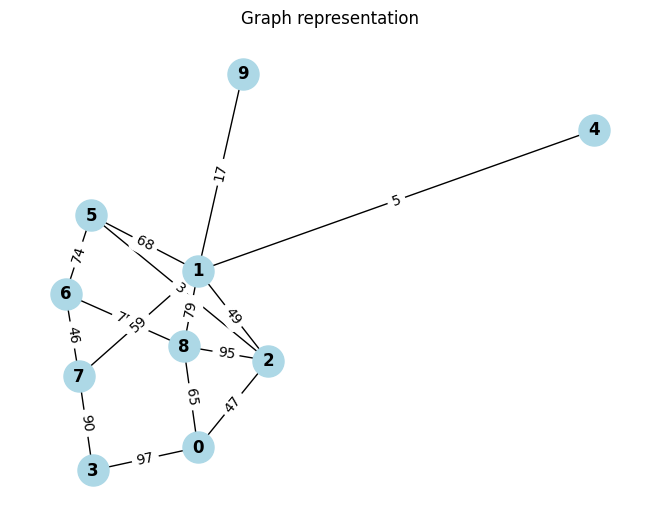

In [13]:
import networkx as nx
import matplotlib.pyplot as plt

# Define the weighted, undirected graph using a dictionary
# Each key is a vertex and its value is a list of tuples (neighbor, weight)

# Create an undirected graph using NetworkX
G = nx.Graph()

# Add nodes and edges to the graph
# To avoid duplicating edges (since the graph is undirected and stored twice in the dictionary),
# we check if an edge already exists.
for node, neighbors in graph.items():
    for neighbor, weight in neighbors:
        if not G.has_edge(node, neighbor):
            G.add_edge(node, neighbor, weight=weight)

# Compute positions for all nodes using a spring layout
pos = nx.spring_layout(G)

# Draw the nodes and edges
nx.draw(G, pos, with_labels=True, node_color="lightblue", node_size=500, font_weight="bold")

# Extract edge weights and draw them as labels on the edges
edge_labels = nx.get_edge_attributes(G, "weight")
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

# Set a title and show the plot
plt.title("Graph representation")
plt.show()


Se pueden realizar recorridos en el grafo, como el recorrido en anchura (BFS) y el recorrido en profundidad (DFS).

In [6]:
from collections import deque

def bfs(graph, start):
    """
    Performs a Breadth-First Search (BFS) on a weighted graph (ignoring the weights) starting from 'start'.
    
    Parameters:
      - graph: A dictionary representing a weighted graph. Each key is a node and its value is a list of tuples (neighbor, weight).
      - start: The starting node for the BFS.
    
    Returns:
      - A list of nodes in the order they were visited.
    """
    visited = set()         # Set to store visited nodes
    queue = deque([start])  # Initialize the queue with the starting node
    order = []              # List to store the order of visited nodes

    while queue:
        node = queue.popleft()  # Remove the first element in the queue
        if node not in visited:
            visited.add(node)
            order.append(node)
            # For each neighbor (ignoring the weight), if not visited, add it to the queue
            for neighbor, _ in graph.get(node, []):
                if neighbor not in visited:
                    queue.append(neighbor)
    return order

# Example usage:    
start_node = 0
traversal_order = bfs(graph, start_node)
print("BFS traversal order starting from node {}: {}".format(start_node, traversal_order))


BFS traversal order starting from node 0: [0, 4, 5, 1, 2, 3]


In [8]:
def dfs(graph, start):
    """
    Performs a Depth-First Search (DFS) on a weighted graph (ignoring the weights) starting from 'start'.
    
    Parameters:
      - graph: A dictionary representing a weighted graph. Each key is a node and its value is a list of tuples (neighbor, weight).
      - start: The starting node for the DFS.
    
    Returns:
      - A list of nodes in the order they were visited.
    """
    visited = set()  # Set to store visited nodes
    stack = [start]  # Initialize the stack with the starting node
    order = []       # List to store the order of visited nodes

    while stack:
        node = stack.pop()  # Remove the last element in the stack
        if node not in visited:
            visited.add(node)
            order.append(node)
            # For each neighbor (ignoring the weight), if not visited, add it to the stack
            for neighbor, _ in graph.get(node, []):
                if neighbor not in visited:
                    stack.append(neighbor)
    return order
# Example usage:
start_node = 0
traversal_order = dfs(graph, start_node)
print("DFS traversal order starting from node {}: {}".format(start_node, traversal_order))

DFS traversal order starting from node 0: [0, 3, 2, 4, 5, 1]


In [17]:
def ucs(graph, start, end):
    """
    Performs Uniform Cost Search (UCS) on a weighted graph starting from 'start' and ending at 'end'.
    
    Parameters:
      - graph: A dictionary representing a weighted graph. Each key is a node and its value is a list of tuples (neighbor, weight).
      - start: The starting node for the search.
      - end: The target node to reach.
    
    Returns:
      - A list of nodes representing the path from 'start' to 'end'.
    """
    queue = [(0, [start])]  # Priority queue with the path cost and the path itself
    while queue:
        cost, path = queue.pop(0)  # Get the path with the lowest cost
        node = path[-1]  # Get the last node from the path
        if node == end:
            return path  # Return the path if the target node is reached
        for neighbor, weight in graph.get(node, []):
            if neighbor not in path:  # Avoid cycles
                queue.append((cost + weight, path + [neighbor]))
        queue.sort()  # Sort the queue based on the total cost
    return None  # Return None if no path is found

# Example usage:
start_node = 3
end_node = 4
ucs_path = ucs(graph, start_node, end_node)
print("UCS path from node {} to {}: {}".format(start_node, end_node, ucs_path))

UCS path from node 3 to 4: [3, 7, 1, 4]


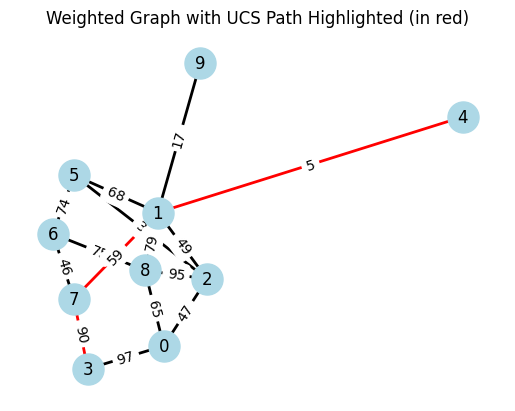

In [18]:
# -----------------------------------------------------------------------------
# Now, use NetworkX and Matplotlib to represent the graph graphically
# and highlight the edges along the UCS path in red.

# Create an undirected graph with NetworkX
G = nx.Graph()

# Add edges from the graph dictionary.
# Since the graph is undirected, we avoid adding duplicate edges.
for node, neighbors in graph.items():
    for neighbor, weight in neighbors:
        # Only add the edge if it is not already in the graph.
        if not G.has_edge(node, neighbor):
            G.add_edge(node, neighbor, weight=weight)

# Compute positions for the nodes using a spring layout
pos = nx.spring_layout(G)

# Create a set of edges that are part of the UCS path.
# For an undirected graph, store each edge as a tuple (min, max) for consistency.
path_edges = set()
if ucs_path:
    for i in range(len(ucs_path) - 1):
        u = ucs_path[i]
        v = ucs_path[i+1]
        path_edges.add((min(u, v), max(u, v)))

# Determine edge colors: red if the edge is in the UCS path, black otherwise.
edge_colors = []
for u, v in G.edges():
    if (min(u, v), max(u, v)) in path_edges:
        edge_colors.append("red")
    else:
        edge_colors.append("black")

# Draw nodes and labels
nx.draw_networkx_nodes(G, pos, node_color="lightblue", node_size=500)
nx.draw_networkx_labels(G, pos)

# Draw the edges with the specified colors and a thicker width for better visibility
nx.draw_networkx_edges(G, pos, edge_color=edge_colors, width=2)

# Draw edge labels (i.e., weights)
edge_labels = nx.get_edge_attributes(G, "weight")
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

plt.title("Weighted Graph with UCS Path Highlighted (in red)")
plt.axis("off")
plt.show()